<a href="https://colab.research.google.com/github/annabohrer/Data-Science/blob/main/Anna_Bohrer_Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Midterm Project

Directions:

*   Use any and all resources available to you
*   Comment and explain the code
*   Answer the questions to the best of your abilities
*   There are no points for pain: ask for help

Save this notebook to your GitHub and submit the link.

In [42]:
import numpy as np                                                              #importing outside programs
import matplotlib.pyplot as plt

## Part 1: Getting your data

Create a google form to input your data.
Follow the same method as [Lab 5](https://colab.research.google.com/drive/1zYvyhrz2wVnJXlZqj_PpxOxplfS3LN9Y?usp=sharing).

In [43]:
import pandas as pd
def get_database(url):  # This function loads the google spreadsheet            #defining the url
    url_head = "https://docs.google.com/spreadsheets/d/"
    url_foot = "/gviz/tq?tqx=out:csv&sheet="
    url_body = url.split('/')[5]
    sheet_name = "1"
    url_csv = url_head + url_body + url_foot + sheet_name
    df = pd.read_csv(url_csv, sep=',', skiprows=0)
    return df

Put your form url here:

In [44]:
url = 'https://docs.google.com/spreadsheets/d/19btjPrG45bYbTshrRvatEPSOJIpkWdIWabPzgIRI24A/edit?resourcekey=undefined#gid=1711033826'

In [45]:
data = get_database(url)                                                        #data will be equal to the url

In [46]:
data = np.array(data)                                                           #make a list of the raw data
print(data, data.shape)

[['10/26/2022 16:36:03' 1.5 5.11]
 ['10/26/2022 16:36:36' 3.0 9.4]
 ['10/26/2022 16:36:54' 4.0 12.57]
 ['10/26/2022 16:37:23' 5.9 19.0]
 ['10/26/2022 16:37:39' 9.0 28.0]] (5, 3)


In [47]:
circumferences = data[:,2]                                                      #circumferences are the third column
diameters = data[:,1]                                                           #diameters are the second column
print(circumferences, diameters)                                                #how the numbers will be printed

[5.11 9.4 12.57 19.0 28.0] [1.5 3.0 4.0 5.9 9.0]


In [48]:
x = diameters                                                                   #defining x and y
y = circumferences

Plot your data points

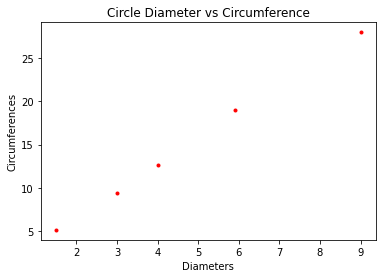

In [49]:
plt.title("Circle Diameter vs Circumference")                                   #plot title

plt.xlabel("Diameters")                                                         #labels of the x and y axis
plt.ylabel("Circumferences")

plt.plot(x, y, 'r.');                                                           #plotting the numbers with a red dot

## Part 2: Linear Fit

Follow the steps in the [Linear Fit notebook]() to run a linear fit on your data.

In [50]:
best_loss = 100000000000
best_m = 0
best_b = 0 

for m_guess in np.linspace(-100,100,100):                                       #for m it will go through 100 numbers through -100 and 100 to find the m_guess
    for b_guess in np.linspace(-100,100,100):                                   #its inside the other function and does the same but with the y intercept which is b
        
        y_guess = m_guess * x + b_guess                                         #the equation y=mx+b 

        loss = np.sum((y_guess - y)**2)                                         #this is what the loss will equal

        if loss < best_loss:                                                    #if the loss is less than the best_less than the following will happen
            
            best_loss = loss
            best_m = m_guess                                                    #the best m will be the m guess -- the slope
            best_b = b_guess                                                    #the best b will be the b guess -- the y intercept

Plot the line of best fit:

Use blue dots for the collected data and a red line for the estimate.

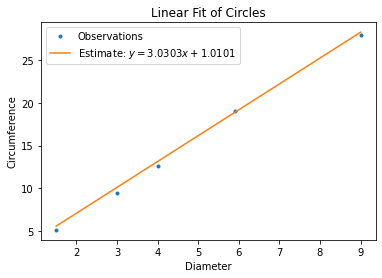

In [51]:
plt.title('Linear Fit of Circles')                                              #title of plot

plt.xlabel('Diameter')                                                          #labels of x and y axis
plt.ylabel('Circumference')

# Plot the collected data
plt.plot(x,y, '.', label='Observations')                                        #plot x and y with a dot and label it observations

y_estimate = best_m * x + best_b                                                #this is the equation y=mx+b

# Plot the line of best fit
plt.plot(x, y_estimate, label=f'Estimate: $y = {round(best_m, 4)} x + {round(best_b, 4)}$')       #plot the line of best fit with the x and the estimate of the y 
                                                                                                  #label it in a mathematical formula which is the dollar signs and round it to the nearest 4th digit

plt.legend();                                                                   #add a legend

The estimated relationship is:

$C = 3.0303 D + 1.0101$

## Part 3: Interpretation

Answer the questions in text cells

#### Question 1:

What do $m$ and $b$ represent in these equations?

m is slope
b is the y intercept

#### Question 2:

Guess what the correct values $m$ and $b$ should be.

the correct value for m is pi
the correct value for b is 0 

#### Question 3:

Does it make sense to include $b$ in the parameters?

No

## Bonus:

These problems are extra credit. You may use any resources, but be sure to explain your code.

#### Bonus 1: Plot the squared errors from your line of best fit

In [52]:
import numpy as np
  
# Given values
Y_true = [x]  # Y_true = Y (original values)                                    #the true values are the original diameters
  
# Calculated values
Y_pred = [y_estimate]  # Y_pred = Y'                                            #the predicted values are the line of best fit 
  
# Mean Squared Error
MSE = np.square(np.subtract(Y_true,Y_pred)).mean()                              #the formula to find the mean squared error

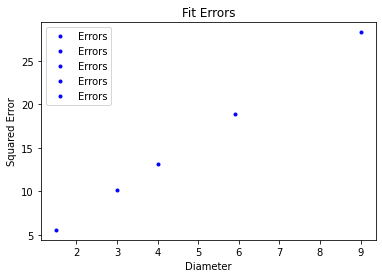

In [53]:
plt.title("Fit Errors")                                                         #plot title

plt.xlabel("Diameter")                                                          #labels for x and y axis
plt.ylabel("Squared Error")

squared_error = MSE                                                             #defining squared error to equal the answer from mse

plt.plot(Y_true, Y_pred, 'b.', label = "Errors")                                #ploting the numbers and the dots will be blue and it will be labeled as errors

plt.legend();                                                                   #there will be a legend

#### Bonus 2: Plot the errors as a histogram

In [ ]:
plt.title("Errors")


What distribution does this histogram look like?

#### Bonus 3: Find the circle with the largest error. 
Hint: use np.max

In [ ]:
largest_error = ...

#### Bonus 4: Remove the circles with the 2 largest errors and run the fit again.


In [ ]:
...

What is the difference in your error?

#### Bonus 5: Find and explain a better method of fitting this data